In [2]:
# importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

data collection

In [3]:
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.shape

(1599, 12)

preprocessing

In [6]:
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and visualisation

In [7]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


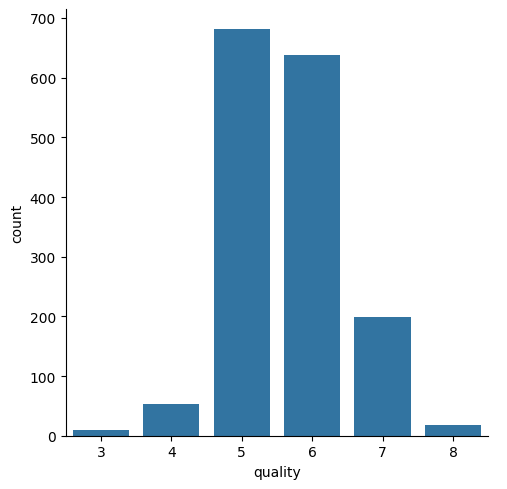

In [13]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

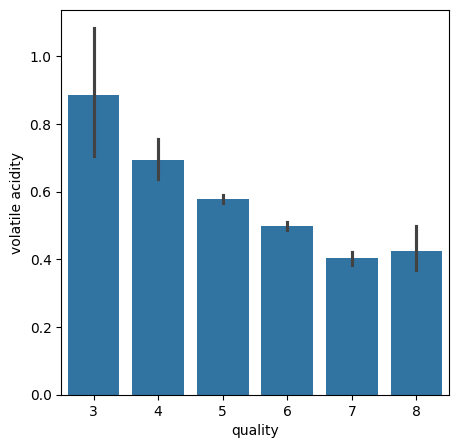

In [15]:
# comparing volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

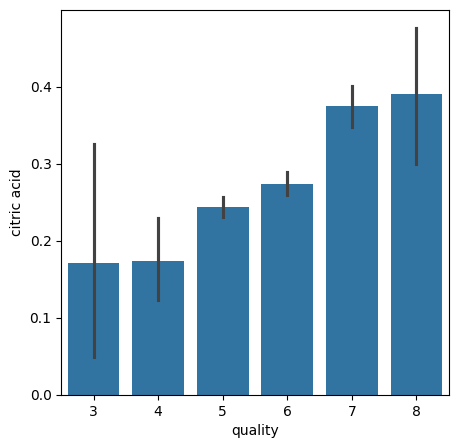

In [19]:
# comparing cidity acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

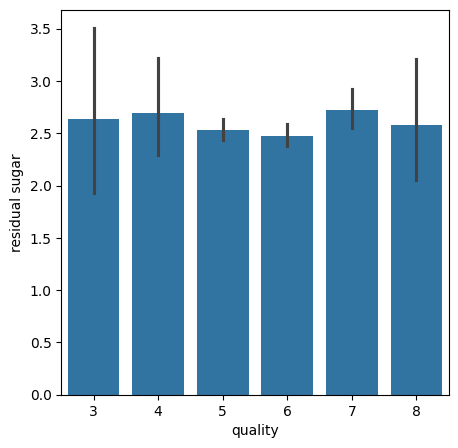

In [20]:
# comparing cidity acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

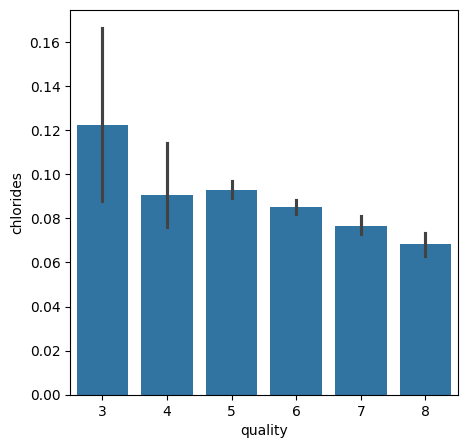

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

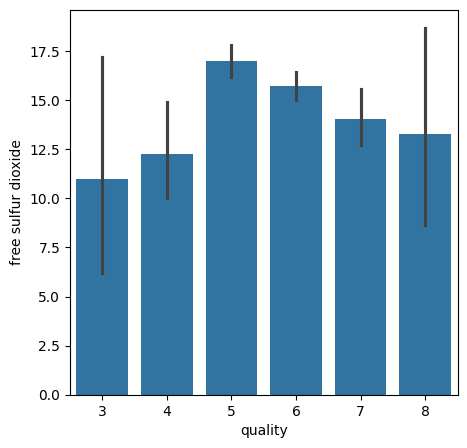

In [24]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_dataset)

In [25]:
correlation = wine_dataset.corr()

<Axes: >

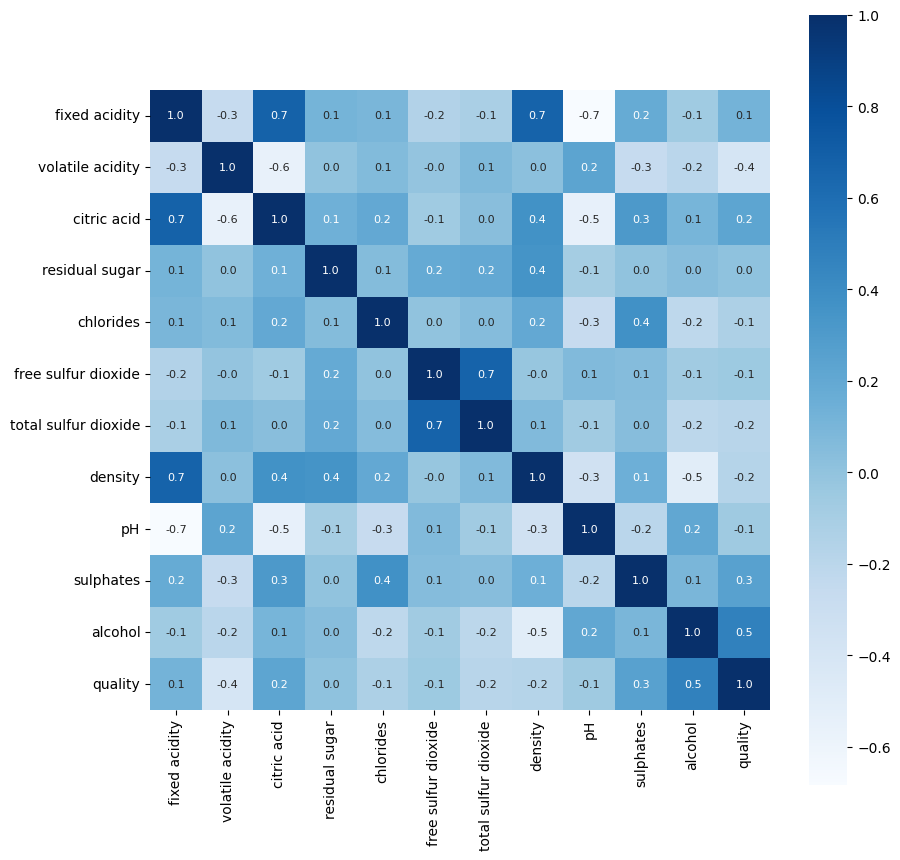

In [28]:
# constructing a heatmap to understand the correlation between the column
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [34]:
# Data Preprocessing
# separate the data and label

x = wine_dataset.drop('quality', axis=1)



In [33]:
#label binarisation
y = wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [35]:
# training and test data
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [37]:
print(x_test.shape,x_train.shape, wine_dataset.shape)

(320, 11) (1279, 11) (1599, 12)



Random Forest Classifier

In [38]:
model = RandomForestClassifier()

In [40]:
model.fit(x_train, y_train) #this will fit the datapoints into the model

RandomForestClassifier()

In [42]:
train_data_prediction = model.predict(x_train)


In [49]:
accuracy_trained_score = accuracy_score(train_data_prediction, y_train)
print(accuracy_trained_score)

1.0


In [46]:
test_data_prediction = model.predict(x_test)
accuracy_test_score = accuracy_score(test_data_prediction, y_test)

In [48]:
print(accuracy_test_score)

0.915625


In [54]:
# Predictive system
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 1):
  print('It is a good quality wine')
else:
  print('It is a good quality wine')

[1]
It is a good quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
# Predictive system
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 1):
  print('It is a good quality wine')
else:
  print('It is a bad quality wine')

[0]
It is a bad quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
